# 1. Perkenalan

## Phase 1 Milestone 2
> _Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1._

---
Milestone ini dikerjakan oleh **Rizal Aditya - 008**

Untuk **Milestone 2** ini saya memilih kasus _classification_/*binary classification*. 

### Abstract
Ada sebuah tim NFL ingin melakukan recruitment pemain baru, dengan cara mengikuti draft NFL setiap tahunnya. Tim NFL ini ingin mencari pemain yang layak untuk masuk ke dalam tim. Agent Recruitment pemain akan memilih pemain dengan syarat yang diinginkan oleh tim NFL ini. Sehingga Agent ini membutuhkan informasi mengenai statistik para pemain yang ingin di recruit. Tetapi Agent bingung bagaimana memilih pemain yang sesuai dengan apa yang diinginkan dan mencari tau pemain mana saja yang belum direcruit yang sesuai dengan syarat tim NFL.

### Task
Dari informasi diatas, kita akan membantu Agent untuk mencari referensi yang sesuai dengan syarat tim NFL. Kita memerlukan bantuan machine learning. Untuk memberikan informasi apakah pemain yang akan dipilih, untuk di recruit itu sudah di recruit tim lain atau tidak. Dan mencari pemain yang belum memiliki tim untuk dilakukan draft recuitment sesuai dengan syarat tim NFL, dengan menggunakan beberapa fitur yang akan kita persiapkan dari dataset yang sudah kita dapatkan sebelumnya.

Sumber dataset ini berasal dari kaggle. Anda dapat mengaksesnya [disini](https://www.kaggle.com/redlineracer/nfl-combine-performance-data-2009-2019)

Di dalam melakukan tugas kita dalam membuat model machine learning yang bagus. Kita akan menggunkaan beberapa algoritma yang telah kita pelajari selama belajar di phase 1 ini. Karena problem kita adalah *classification* maka kita akan menggunkaan algoritma machine learning yang dapat melakukan *classification*.

# 2. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

# 3. Data Loading

In [2]:
# definisi letak file dataset
dir = "data/NFL.csv"

# Import Dataset Original
data_ori = pd.read_csv(dir)

# Copy Dataset yang akan kita gunakan
data_copy = data_ori.copy()
print(f"Jumlah baris dari dataset ini adalah : {data_copy.shape[0]}")
print(f"Jumlah kolom dari dataset ini adalah : {data_copy.shape[1]}")
data_copy.sample(5, random_state=0) # menampilkan 5 data secara acak dari dataset

Jumlah baris dari dataset ini adalah : 3477
Jumlah kolom dari dataset ini adalah : 18


,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
1735,2017,Chuck Clark\ClarCh00,21.0,Virginia Tech,1.8288,94.347213,4.54,86.36,16.0,309.88,6.85,4.07,Baltimore Ravens / 6th / 186th pick / 2017,28.209582,defense,defensive_back,FS,Yes
1666,2016,Jihad Ward\WardJi02,21.0,Illinois,1.9558,134.716934,5.11,63.50,20.0,281.94,7.38,4.63,Oakland Raiders / 2nd / 44th pick / 2016,35.218699,defense,defensive_lineman,DT,Yes
2070,2018,Ryan Izzo\IzzoRy00,22.0,Florida St.,1.9558,116.119647,4.94,83.82,18.0,279.40,7.15,4.43,New England Patriots / 7th / 250th pick / 2018,30.356858,offense,backs_receivers,TE,Yes
290,2010,Kareem Jackson\JackKa99,21.0,Alabama,1.7780,88.904105,4.40,95.25,13.0,299.72,6.92,4.14,Houston Texans / 1st / 20th pick / 2010,28.122783,defense,defensive_back,CB,Yes
45,2009,Alex Mack\MackAl20,23.0,California,1.9304,141.067227,5.17,NaN,NaN,NaN,NaN,NaN,Cleveland Browns / 1st / 21st pick / 2009,37.855720,offense,offensive_lineman,C,Yes


Dari informasi sekilas mengenai data diatas. Kita memiliki **3477** baris data dan **17** sebagai calon fitur dan **1** sebagai label  target. Dataset ini juga Hasil Gabungan NFL dari 2009 hingga 2019. Yang berisi informasi tentang hasil pengujian kinerja olahraga, kelulusan sekolah, hasil rancangan, dan demografi umum tentang pemain yang akan mengikuti draft NFL.

Sebelum lebih lebih jauh lagi untuk melakukan eksplorasi dengan dataset ini. Kita akan mencoba memahami fitur yang ada di dalam dataset ini.



**INFORMATION ABOUT DATASET**

| Nama Kolom | Description |
| --- | --- |
| **Year** | Tahun kehadiran di NFL Combine |
| **Player** | Nama pemain |
| **Age** | Usia (tahun) |
| **School** | Program Football |
| **Height** | Tinggi (m) |
| **Weight** | Berat badan (kg) |
| **Sprint_40yd** | Waktu sprint 40 yard (s) | 
| **Vertical_Jump** | Hasil lompatan vertikal (cm) |
| **Bench_Press_Reps** |  Pengulangan bench press maksimum dicapai saat mengangkat beban 102,1 kg |
| **Broad_Jump** | Hasil lompat jauh (cm) |
| **Agility_3cone** | Waktu uji kelincahan menggunakan 3 cone |
| **Shuttle** |  Waktu antar-jemput lateral | 
| **Drafted..tm.rnd.yr.** | Tim yang dipilih oleh atlet, putaran draft, draft pick, dan tahun |
| **BMI** | Indeks massa tubuh (kg/m2) |
| **Player_Type** | Pemain penyerang atau pemain bertahan atau tim khusus |
| **Position_Type** |  Klasifikasi luas dari posisi bermain atlet |
| **Position** |  Posisi bermain |
| **Drafted** | Apakah pemain direkrut selama NFL Draft? |

In [3]:
# Selanjutnya saya ingin melihat informasi dari dataset ini
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

Dari hasil informasi data diatas, dapat kita lihat bahwa dataset ini memiliki 2 tipe data. Yaitu numerikal dan kategorikal data.

Dari informasi diatas dapat dilihat juga bahwa, ada beberapa kolom yang tidak lengkap begitu. Seperti kolom `Age`, `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, dan `Shuttle`.  Dan bisa dibilang kolom-kolom tersebut memiliki missing value. 

# 4. Exploratory Data Analysis (EDA)

Selanjutnya, Kita akan mencari informasi lebih jauh mengenai dataset ini.

In [4]:
# Melihat 5 row data
data_copy.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


### 4.1 Melihat informasi perbandingan dari label target

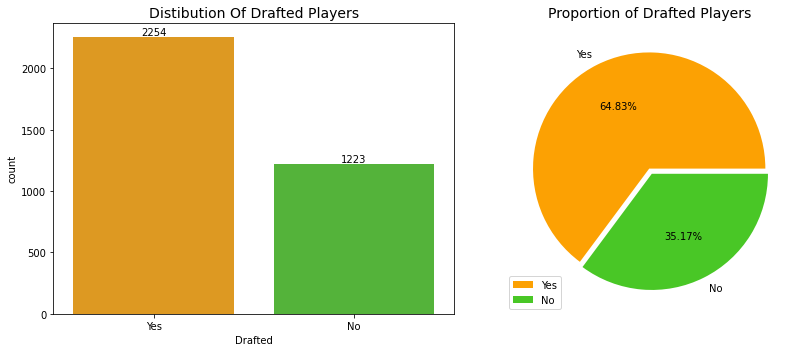

In [5]:
# membuat figure
plt.figure(figsize=(12,5))

# Ploting untuk menghitung label target
plt.subplot(1,2,1) 
ax = sns.countplot(data=data_copy, x='Drafted', palette = ["#fca103","#49c726"])
ax.bar_label(ax.containers[0])
plt.title("Distibution Of Drafted Players", fontsize='14')
# Plotting untuk percentage
plt.subplot(1,2,2)
plt.pie(data_copy['Drafted'].value_counts(), labels=data_copy['Drafted'].unique(), explode=(0,0.05), autopct='%.2f%%', colors = ["#fca103","#49c726"])
plt.title("Proportion of Drafted Players", fontsize='14')
plt.legend()
plt.tight_layout()
plt.show()


| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |

Dari informasi visualisasi diatas terlihat bahwa label target memiliki proporsi yang bisa dibilang **imbalance(mild)**. Dari informasi proporsi terlihat bahwa pemain yang sudah direkrut memiliki persentase **64.83%**, dan pemain yang belum direkrut memiliki persentase **35.17%**. 



### 4.2 Melihat Informasi pada umur pemain yang paling banyak di rekrut

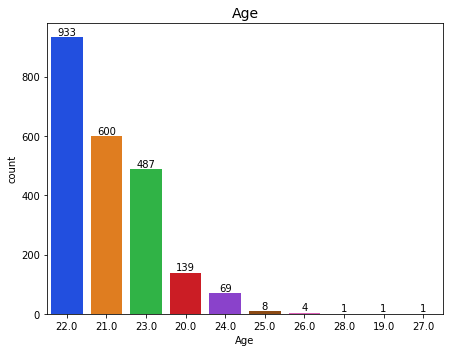

In [6]:
# melakukan filter untuk pada pemain yang sudah  mendapatkan tim NFL
drafted = data_copy[data_copy['Drafted'] == 'Yes']

# membuat count plot unutk melihat informasi di dalam `Age`
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
ax = sns.countplot(
    x = drafted["Age"],
    order = drafted["Age"].value_counts().sort_values(ascending = False).index,
    palette='bright')
ax.bar_label(ax.containers[0])
plt.title("Age", fontsize = "14")
plt.tight_layout()
plt.show()

Dari hasil informasi diatas terlihat bahwa pemain yang di rekrut, dominan pada umur 22 tahun. Tidak menutup kemungkinan juga para pemain direkrut pada rentang usia 20 - 25 tahun. 

### 4.3 Sekolah mana yang memiliki jumlah pemain terbanyak yang direkrut menjadi NFL?

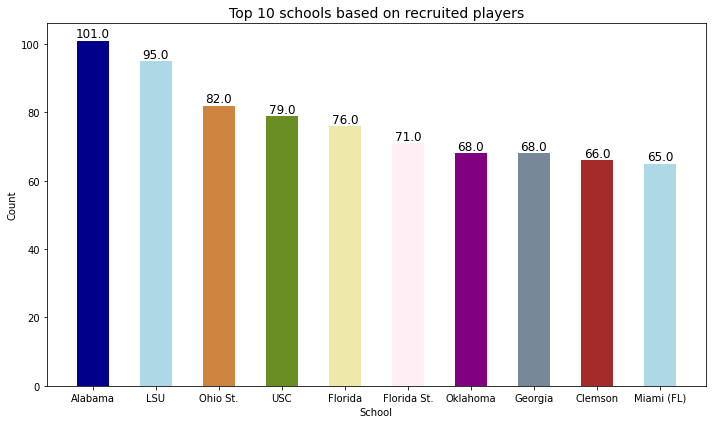

In [7]:
# Prepare data
import random
shcool = data_copy.groupby('School').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
n = shcool['School'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(10,6))
plt.bar(shcool['School'], shcool['counts'], color=c, width=.5)
for i, val in enumerate(shcool['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.title("Top 10 schools based on recruited players", fontsize='14')
plt.xlabel('School')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Dari informasi diatas, dapat kita lihat bahwa program pendidikan Football yang memiliki jumlah pemain terbanyak yang direkrut menjadi NFL adalah **Alabama**, **LSU** dan **Ohio St.**. Mungkin saja program pendidikan football tersebut merupakan yang paling favorit untuk menjadi pemain NFL.

### 4.4 Tahun berapa yang memiliki jumlah pemain terbanyak yang direkrut menjadi NFL?

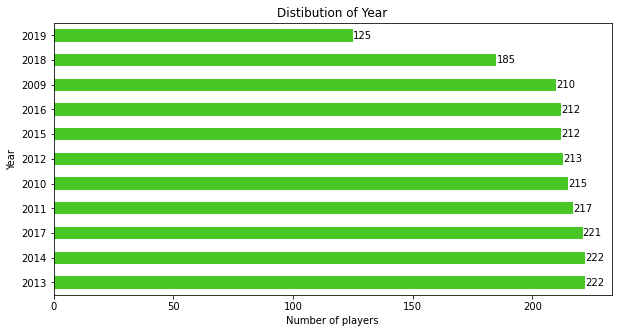

In [8]:
# Get the data
years = drafted['Year'].value_counts()

# Plot the data
ax = years.plot(kind='barh', figsize=(10,5), color="#49c726")
ax.bar_label(ax.containers[0])
plt.ylabel('Year') # add to x-label to the plot
plt.xlabel('Number of players') # add y-label to the plot
plt.title('Distibution of Year') # add title to the plot
plt.show()

Dari hasil informasi visualisasi diatas, terlihat bahwa pada tahun 2013, 2014, dan 2017 merupakan jumlah pemain terbanyak di rekrut sebagain pemain NFL. 

### 4.5 mencari posisi pemain yang paling banyak direkrut menjadi NFL


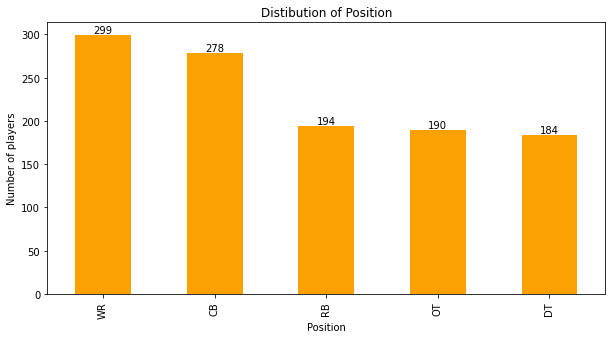

In [9]:
# Get the data
position = drafted['Position'].value_counts().head()

# Plot the data
ax = position.plot(kind='bar', figsize=(10,5), color="#fca103")
ax.bar_label(ax.containers[0])
plt.xlabel('Position') # add to x-label to the plot
plt.ylabel('Number of players') # add y-label to the plot
plt.title('Distibution of Position') # add title to the plot
plt.show()

Dari hasil visualisasi diatas, terlihat bahwa dari 5 posisi pemain yang sering direkrut adalah posisi sebagi **WR**, **CB**, **RB**, **OT**, dan **DT**.

Berikut 3 penjelan dari posisi yang sering di rekrut sebagi pemain NFL :
- Wide receiver (WR), adalah pemain yang pada umumnya memiliki tingkat menangkap dan kecepatan lari paling baik dalam tim, karena memang itu tugasnya.
- Cornerback (CB) merupakan musuh terkuat dari Wide Receiver. Tugasnya menghalau Wide Receiver untuk menangkap bola dan mencoba menangkap bola yang dioperkan ke Wide Receiver (Intercept).
- Running Back (RB) adalah pemain bertugas membawa bola yang diberikan oleh Quarterback. Running Back itu bukan hanya kecepatan yang di test, namun juga kekuatan fisik ketika menubruk lawan (Trucking kalau di bahasa american football).

### 4.6 Mencari informasi tipe pemain yang sering di rekrut untuk menjadi pemain NFL

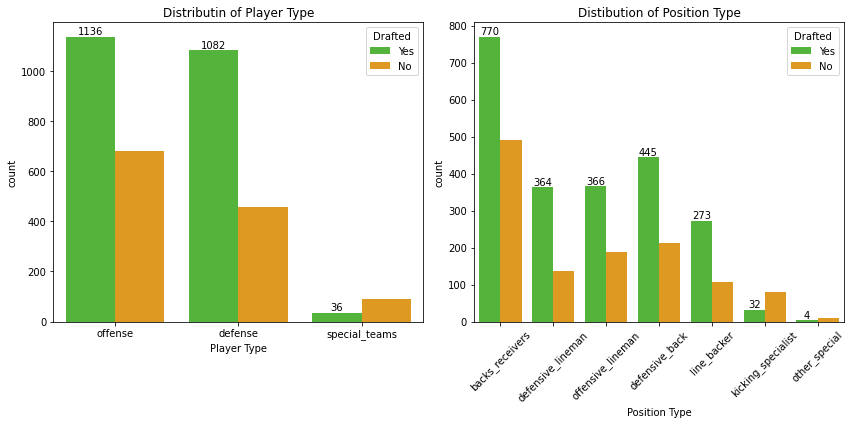

In [10]:
# Create a figure
plt.figure(figsize=(12,6))

# Plotting for Player Type
plt.subplot(1,2,1)
ax = sns.countplot(data=data_copy, x='Player_Type', hue='Drafted', palette = ["#49c726", "#fca103"])
ax.bar_label(ax.containers[0])
plt.title('Distributin of Player Type')
plt.xlabel('Player Type')

# Plotting for Position Type
plt.subplot(1,2,2)
ax = sns.countplot(data=data_copy, x='Position_Type', hue='Drafted', palette = ["#49c726", "#fca103"])
ax.bar_label(ax.containers[0])
plt.title('Distibution of Position Type')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Position Type')
plt.tight_layout()
plt.show()

Dari hasil visualisasi diatas, dapat di tarik informasi bahwa :
- Dari hasil tipe pemain yang paling sering di rekrut adalah tipe **offense** dan pemain tipe **defense** yang direkrut menjadi NFL
- Dari hasil Tipe posisi yang paling dominan di rekrut adalah **back_receivers** karena dalam permaian NFL di perlukan kemampuan pemain dalam melakukan operan dari belakang ke depan yang akan dikirimkan ke **WR**

### 4.7 Apakah pemain yang direkrut dan yang tidak direkrut memiliki performa berbeda pada tes kinerja?

In [11]:
# Melihat statistik deskriptif dari pemain yang tidak di rekrut
data_copy[data_copy['Drafted'] == 'No'].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1223.0,2013.944399,3.151159,2009.000000,2011.000000,2014.000000,2017.000000,2019.000000
Age,684.0,22.228070,0.929759,18.000000,22.000000,22.000000,23.000000,26.000000
Height,1223.0,1.868696,0.068013,1.676400,1.828800,1.879600,1.905000,2.082800
Weight,1223.0,107.639732,20.231034,67.585263,92.079251,101.151099,120.428774,167.375585
Sprint_40yd,1148.0,4.811080,0.298948,4.290000,4.580000,4.730000,4.990000,6.000000
Vertical_Jump,936.0,81.701976,10.641778,44.450000,74.930000,82.550000,88.900000,111.760000
Bench_Press_Reps,863.0,19.005794,6.146224,4.000000,15.000000,19.000000,23.000000,36.000000
Broad_Jump,926.0,287.886782,23.245629,198.120000,274.320000,292.100000,304.800000,358.140000
Agility_3cone,746.0,7.275697,0.434003,6.280000,6.970000,7.170000,7.517500,9.040000
Shuttle,779.0,4.434390,0.278861,3.900000,4.220000,4.370000,4.600000,5.560000


In [12]:
# melihat statistik deskriptif dari pemain yang di rekrut
data_copy[data_copy['Drafted'] == 'Yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2254.0,2013.758208,3.032537,2009.00000,2011.000000,2014.000000,2016.000000,2019.000000
Age,2243.0,21.908605,0.969256,19.00000,21.000000,22.000000,23.000000,28.000000
Height,2254.0,1.876828,0.067053,1.65100,1.828800,1.879600,1.930400,2.057400
Weight,2254.0,110.889449,20.533794,70.76041,93.440028,106.594207,129.727418,165.107623
Sprint_40yd,2155.0,4.746705,0.300497,4.22000,4.510000,4.660000,4.940000,5.850000
Vertical_Jump,1844.0,84.250450,10.597095,49.53000,77.470000,85.090000,91.440000,114.300000
Bench_Press_Reps,1709.0,20.864833,6.582203,2.00000,16.000000,21.000000,25.000000,49.000000
Broad_Jump,1823.0,293.530927,24.100702,208.28000,279.400000,297.180000,309.880000,373.380000
Agility_3cone,1514.0,7.218554,0.396786,6.44000,6.922500,7.120000,7.480000,8.420000
Shuttle,1558.0,4.388569,0.256867,3.81000,4.200000,4.340000,4.550000,5.380000


Dari hasil statistik deskriptif diatas dapat dilihat bahwa tidak terlihat pebedaan secara signifikan antara pemain yang di rekrut dengan pemain yang tidak di rekrut menjadi NFL. Tetapi dilihat lebih detail lagi bahwa pemain NFL harus memiliki badan yang bagus dan memiliki kecepatan dalam membawa bola. Hal ini dapat dilihat bahwa :
- dari informasi `Weight` terlihat bawha ada perbedaan dalam merekrut pemain berdasarkan berat badan. Pemain yang di rekrut memiliki rata-rata berat 110 kg dan yang tidak direkrut memiliki rata-rata berat 107 kg. 
- dari informasi `Sprint_40yd` terlihat bahwa ada perbedaan dalam merekrut pemain berdasarkan kecepatan dalam melakukan sprint dalam 40 yard.
- dari informasi `Broad_Jump` terlihat juga ada perbedaan signifikan dalam merekrut pemain berdasarkan lompat jauh. ini mungkin berkorelasi dengan speed dalam berlari setiap pemain.

Dapat kita simpulkan bahwa setiap pemain NFL yang direkrut harus memiliki postur tubuh yang bagus dan memiki kecepatan dalam melakukan penetrasi. Hal ini memang ciri khas permainan dalam NFL.

### 4.8 Mengecek Correlation matriks

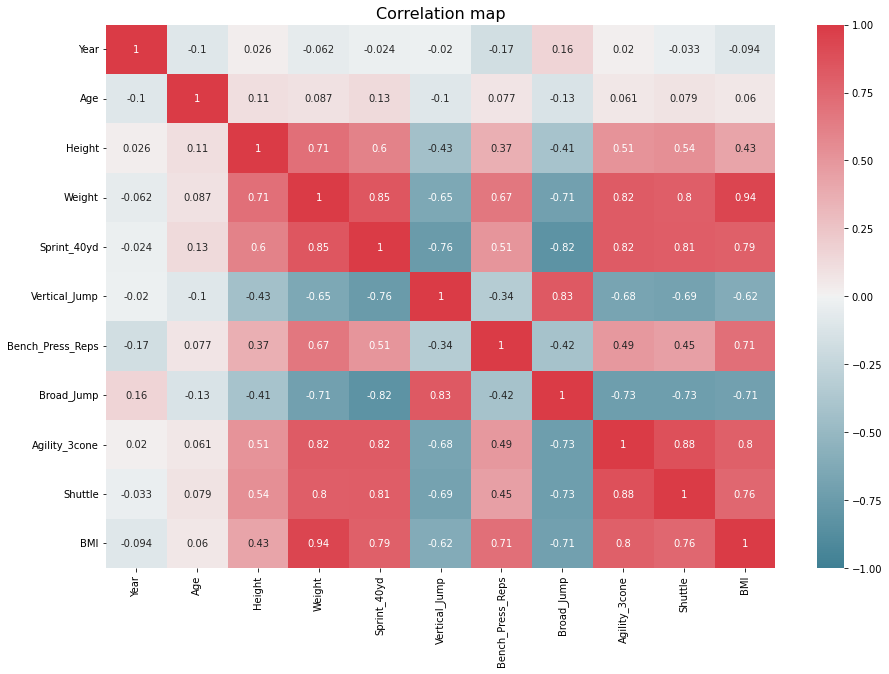

In [13]:
# Melihat peta correlasi 
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap  
corr = data_copy.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap=cmap)
plt.title('Correlation map', fontsize=16)
plt.show()

Dari hasil korelasi heatmap diatas dapat dilihat bahwa :
- Kita memiliki korelasi antara fitur dengan fitur sehingga kita memiliki Multikolinearitas yang tinggi. Dampaknya adalah adanya perubahan kecil pada data dari sampel ke sampel akan menyebabkan perubahan drastis pada nilai koefisien. Perubahan pada satu variabel dapat menyebabkan perubahan besar pada nilai koefisien regresi parsial variabel lainnya. 
- Untuk itu kita akan melakukan fitur selection nantinya untuk memilih fitur mana saja yang akan mempengaruhi dalam membuat model.

### Conclusion for EDA

Dari hasil eksplorasi sederhada diatas dapat ditarik informasi :
- Pemain yang direkrut memiliki presentase **64.83%** atau sebanyak 2254 pemain, dan pemain yang belum direkrut memiliki persentase **35.17%** atau sebanyak 1223 pemain. Sehingga bisa dibilang dataset ini *imbalance* dengan tingkatan **mild**.
- Dari informasi pendidikan, jumlah pemain terbanyak yang direkrut menjadi NFL adalah dari akademi **Alabama**, **LSU** dan **Ohio St..** Mungkin saja program pendidikan football tersebut merupakan yang paling favorit untuk menjadi pemain NFL.
- Dari informasi usia, usia yang sering dilakukan rekrut kisaran umur 20 tahun sampai 24 tahun. Untuk usia diatas 24 tahun sedikit kemungkinan akan direkrut sebagai pemain NFL.
- Dari informasi pemain yang direkrut menjadi NFL posisi paling dominan adalah **Wide receiver (WR)**, **Cornerback (CB)**, dan **Running Back (RB)**. Karena posisi ini merupakan kunci dalam permainan NFL sehingga para tim memerlukan pemain yang bermain dalam posisi tersebut.
- Dari informasi tipe pemain yang direkrut menjadi NFL adalah tipe pemain yang **Offensive** dan **Defensive**. Karena pada dasarnya permainan NFL bergantung pada pemain yang mampu melakukan penyerangan dengan baik dan bertahan dengan baik juga tentunya.
- Dari informasi statistik berdasarkan tes peforma pemain, dapat dilihat bahwa tidak terlalu berdeda secara signifikan. Tetapi setelah dilihat lebih detail lagi bahwa, tipe bermain NFL adalah melakukan pertahan dengan baik dan melakukan penyerangan dengan baik juga tentunyaa, sehingga dalam melakukan pertahan dibutuhkan para pemain yang memiliki kondisi fisik yang bagus. Dan dalam melakukan penyerangan juga diperlukan kecepatan dalam membawa bola, sehingga diperlukan kecepatan berlari. Terlihat ada perbedaan di kolom **Weight**, **Sprint_40yd** dan **Vertical_jump**.



# 5. Data Preprocessing

### 5.1 Get Data Inference

In [70]:
# mengambil 50 data secara random untuk data inference
data_inf = data_copy.sample(50, random_state=8)

# menghapus data inference dari dataframe 
data_copy = data_copy.drop(data_inf.index)

# Reset Index
data_copy.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Display data_inf
data_inf.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2013,Josh Boyd\BoydJo00,23.0,Mississippi St.,1.9050,140.613635,5.14,67.31,32.0,264.16,7.16,4.64,Green Bay Packers / 5th / 167th pick / 2013,38.746946,defense,defensive_lineman,DT,Yes
1,2009,Clint Sintim\SintCl99,23.0,Virginia,1.9050,116.119647,4.75,87.63,NaN,302.26,7.37,4.40,New York Giants / 2nd / 45th pick / 2009,31.997478,defense,line_backer,OLB,Yes
2,2017,T.J. Watt\WattT.00,22.0,Wisconsin,1.9304,114.305277,4.69,93.98,21.0,325.12,6.79,4.13,Pittsburgh Steelers / 1st / 30th pick / 2017,30.674088,defense,line_backer,OLB,Yes
3,2014,Pierre Desir\DesiPi00,23.0,Lindenwood,1.8542,89.811289,4.59,88.90,11.0,337.82,6.86,4.30,Cleveland Browns / 4th / 127th pick / 2014,26.122683,defense,defensive_back,CB,Yes
4,2019,Keenen Brown\BrowKe03,23.0,Texas St.,1.8796,113.398093,4.75,83.82,17.0,297.18,7.27,4.51,NaN,32.097771,offense,backs_receivers,TE,No


### 5.2 Spliting Dataset

In [15]:
# define 'X' and 'y'
X = data_copy.drop(['Drafted'], axis=1)
y = data_copy['Drafted']

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Cek dimensi Train dan Test
print('---- Train - Set ----')
print('Dimensi dari X_train :', X_train.shape)
print('Dimensi dari y_train :', y_train.shape)
print('')
print('---- Test - Set ----')
print('Dimensi dari X_test :', X_test.shape)
print('Dimensi dari y_test :', y_test.shape)

---- Train - Set ----
Dimensi dari X_train : (2741, 17)
Dimensi dari y_train : (2741,)

---- Test - Set ----
Dimensi dari X_test : (686, 17)
Dimensi dari y_test : (686,)


Setelah kita melakukan splitting dataset menjadi data Train-set dan Test-set. Selanjutnya kita akan melakukan tahap **feature engineereing**

### 5.3 Feature Engineering

Di dalam feature engineering ini kita akan melakukan handling **outlier** dan melakukan handling **missing value**. Walpun ada beberapa algoritma yang digunkan tidak sensitive terhadap **outlier** tetapi tidak masalah kita akan melakukan handling saja.

#### 5.3.1 Handling Outlier

Selanjutnya kita akan melakukan handling outlier terhadap beberapa fitur.

Sebelum melakukan handling outlier, kita akan mengecek distribusi dataset nya, dan mengecek nilai dari skewness nya. Untuk menentukan metode yang tepat untuk meakukan handling outlier.



In [16]:
# Create function for create histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16,4))
    
    # Create Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=30, color='#49c726')
    plt.title("Distribution of Histogram")
    
    # Create Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable], color='#fca103')
    plt.title("Distibution of Boxplot")
    plt.show()

Tampilan sebelum di handling outliers


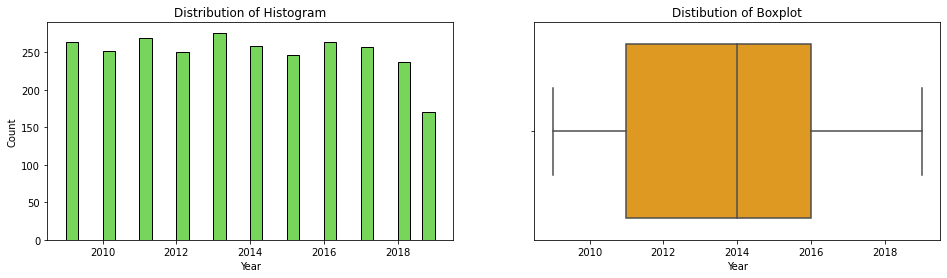

Skewness value 0.03959306288191746


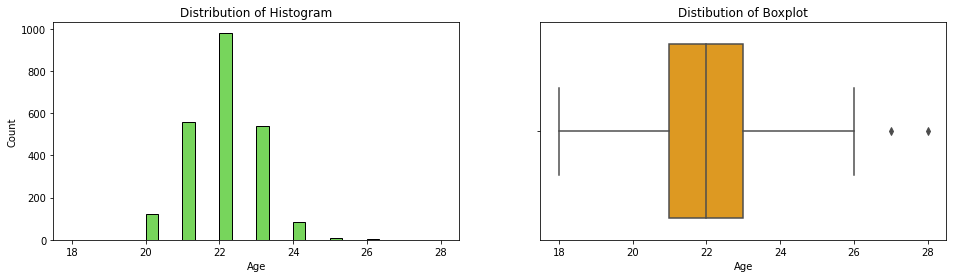

Skewness value 0.2961958922355677


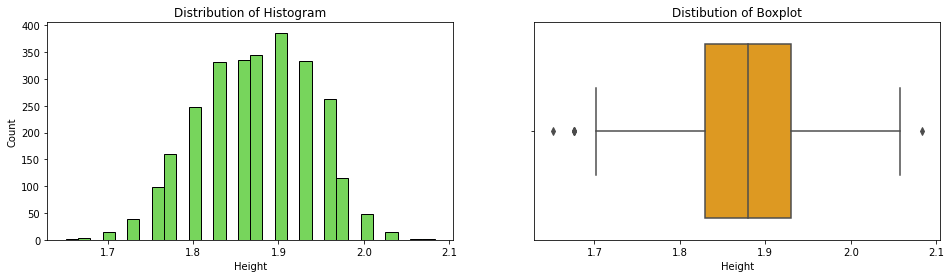

Skewness value -0.16621717876465117


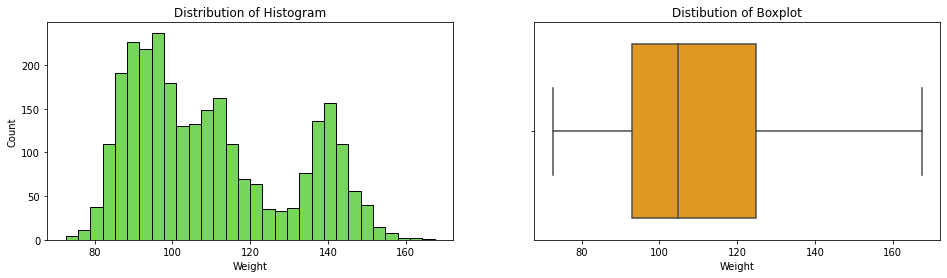

Skewness value 0.5629817115799338


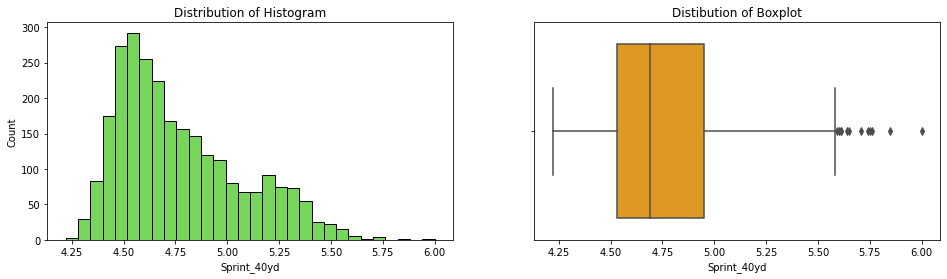

Skewness value 0.7879336812513117


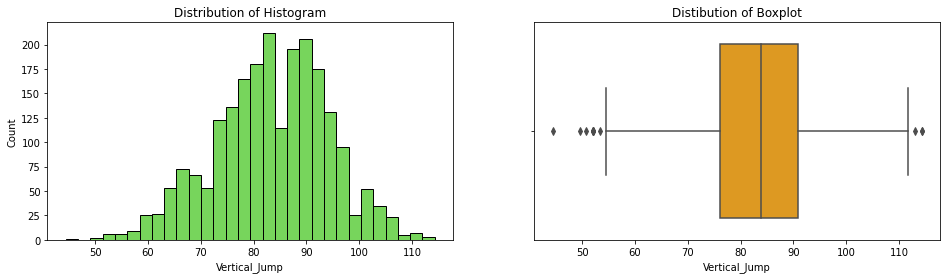

Skewness value -0.23040383225357455


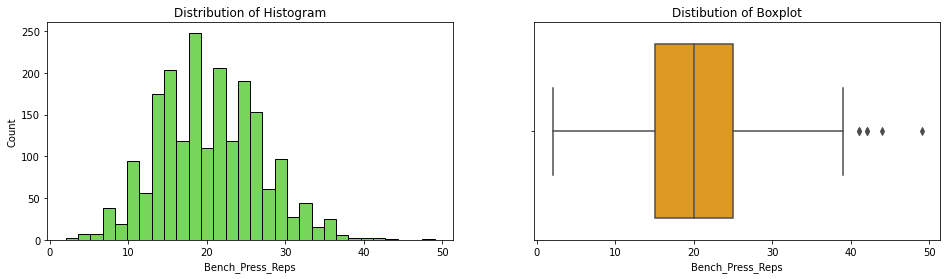

Skewness value 0.2604785864081489


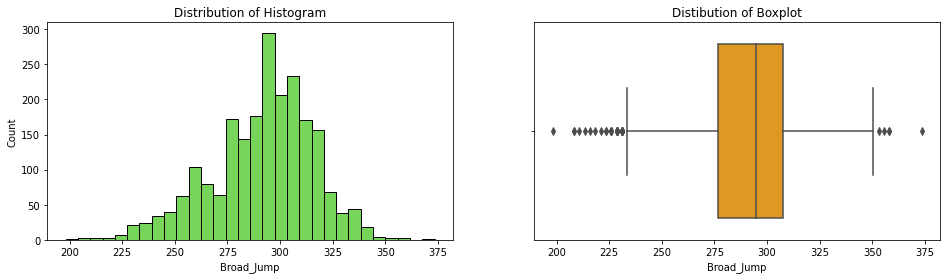

Skewness value -0.48507956270336455


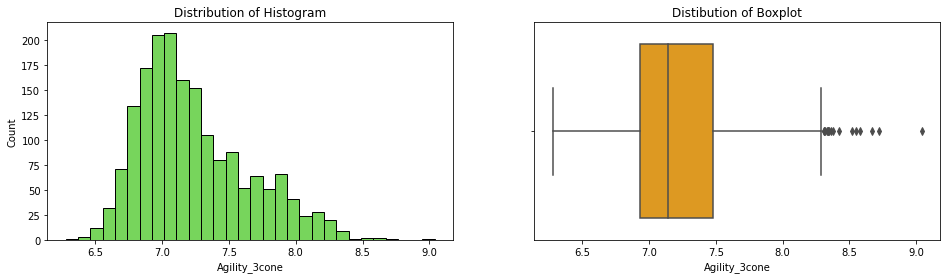

Skewness value 0.7915475266501273


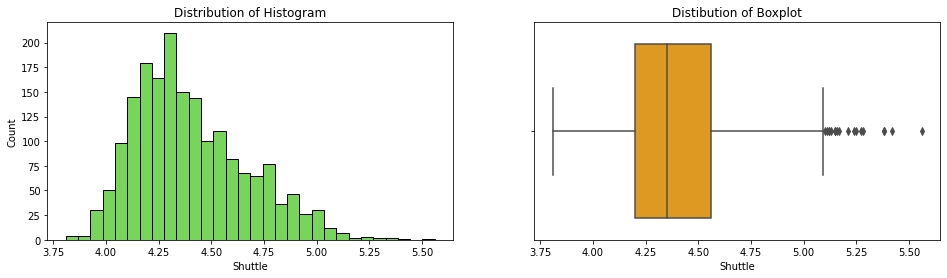

Skewness value 0.7133482298539878


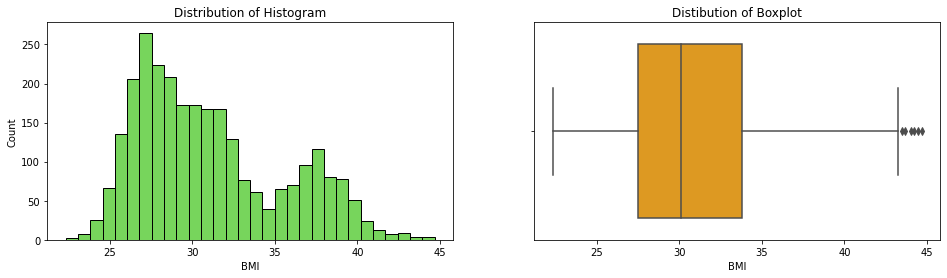

Skewness value 0.6669223815385894


In [17]:
print("Tampilan sebelum di handling outliers")
for cols in X_train.describe().columns:
    diagnostic_plots(X_train, cols)
    print(f"Skewness value {X_train[cols].skew()}")

Setelah melihat hasil distribusi dari **X_train**, selanjutnya kita akan melihat nilai skewnes dan melihat apa yang harus kita lakukan terhadap outlier tersebut.

In [18]:
## Create function for distibution normal

def find_normal_distribution(df, variables):
    upper_boundary = df[variables].mean() + 3 * df[variables].std()
    lower_boundary = df[variables].mean() - 3 * df[variables].std()
    
    return upper_boundary, lower_boundary


## Create function for skew distribution
def find_skew_distribution(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [19]:
# Melakukan pengecekan nilai skewness dan memeberikan label outlier
proses_outlier = pd.DataFrame({'columns': X_train.describe().columns, 
                               'nilai_skewness': data_copy.skew(axis=0)})
proses_outlier.reset_index(drop=True, inplace=True)

proses_outlier['detect'] = np.where(proses_outlier['nilai_skewness'].abs()>0.5, 
                                   'skewed', 'normal')

## Membuat fungsi untuk mencari percentage outlier
outliers = {'percentage_outlier': []}
for row in proses_outlier.index.tolist():
    col = proses_outlier.iloc[row]['columns']
    dist = proses_outlier.iloc[row]['detect']
    if dist == 'normal':
        upper_boundary, lower_boundary = find_normal_distribution(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skew_distribution(X_train, col)
        
    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail/len(X_train)*100
    total_left_tail_percent = total_left_tail/len(X_train)*100
    total_outlier_percent =total_left_tail_percent + total_right_tail_percent
    
    outliers['percentage_outlier'].append(total_outlier_percent)
    
outliers = pd.DataFrame(outliers) # Memasukkan variabel outlier kedalam dataframe
# Melakukan penggabungan
X_train_outlier = pd.concat([proses_outlier, outliers], axis=1)
X_train_outlier['action'] = np.where(X_train_outlier['percentage_outlier']==0, 'No Action',
                                    np.where(X_train_outlier['percentage_outlier']>5, 'Capping','Trimming'))
X_train_outlier

,columns,nilai_skewness,detect,percentage_outlier,action
0,Year,0.025916,normal,0.000000,No Action
1,Age,0.277844,normal,0.693178,Trimming
2,Height,-0.142983,normal,0.072966,Trimming
3,Weight,0.560395,skewed,0.000000,No Action
4,Sprint_40yd,0.780754,skewed,0.437796,Trimming
5,Vertical_Jump,-0.236693,normal,0.109449,Trimming
6,Bench_Press_Reps,0.306593,normal,0.218898,Trimming
7,Broad_Jump,-0.483818,normal,0.291864,Trimming
8,Agility_3cone,0.780109,skewed,0.583729,Trimming
9,Shuttle,0.695656,skewed,0.656695,Trimming


Setleh kita mengecek dan memberikan label terhadap fitur yang memiliki skewnes tentu kita akan melakukan handling dengan 3 metode :
1. **TRIMMING** = Jika outlier < 5%
2. **CAPPING** = Jika outlier direntang 5-15%
3. **KEEP** = Jika outlier >15%, kita tidak akan melakukan handling melainkan akan kita biarkan saja.

In [20]:
# Method Trimming
from feature_engine.outliers import OutlierTrimmer

print(f"Before trimming {X_train.shape}")

# Berhubung ditribusi datanya cenderung normal kita akan menggunakan 3*STD
trim_normal = OutlierTrimmer(capping_method='gaussian',
                     tail='both', fold=3,
                     variables=['Age','Height','Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump'],
                     missing_values='ignore')
# Fit Trim
X_train_a = trim_normal.fit_transform(X_train)

# Apabila distribusi datanya skew kita akan menggunakan 1.5 IQR
trim_skew = OutlierTrimmer(capping_method='iqr',
                          tail='both', fold=1.5,
                          variables=['Sprint_40yd', 'Agility_3cone', 'Shuttle', 'BMI'],
                          missing_values='ignore')
# Fit Trim
X_train_handled = trim_skew.fit_transform(X_train_a)

print(f"After trimming {X_train_handled.shape}")

Before trimming (2741, 17)
After trimming (2666, 17)


In [21]:
## Melakukan penyamaan dimensi pada y_train
y_train_handled = y_train.drop(y_train.index.difference(X_train_handled.index))
print("MELIHAT DIMENSI TRAIN SET")
print('-'*30)
print(f"X_train dimensi : {X_train_handled.shape}")
print(f"y_train dimensi : {y_train_handled.shape}")

MELIHAT DIMENSI TRAIN SET
------------------------------
X_train dimensi : (2666, 17)
y_train dimensi : (2666,)


Setelah kita melakukan handling outlier pada data **X_train**, selanjut nya kita akan mengecek distribusinya setelah dilakukan handling outlier.

Tampilan setelah di lakukan handling outliers


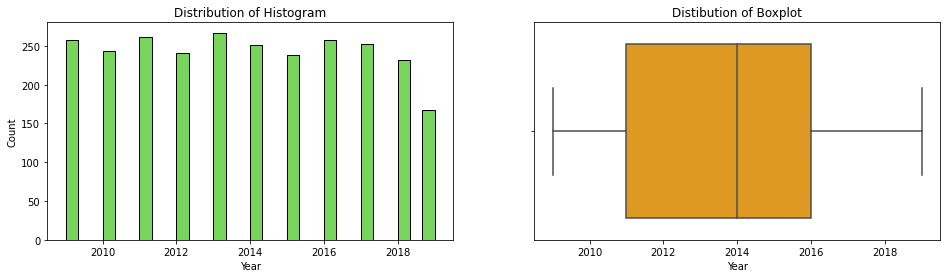

Skewness value 0.03378702121539068


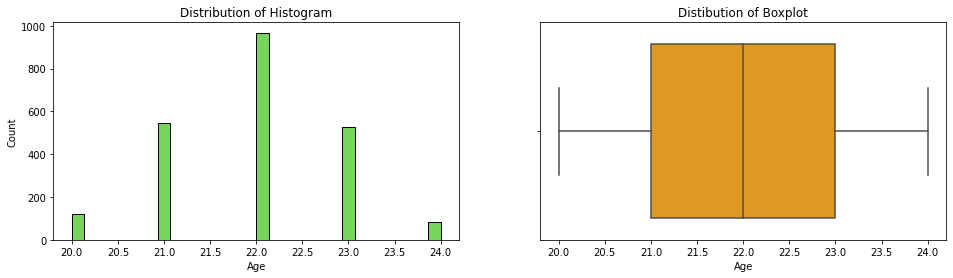

Skewness value -0.051124500386016444


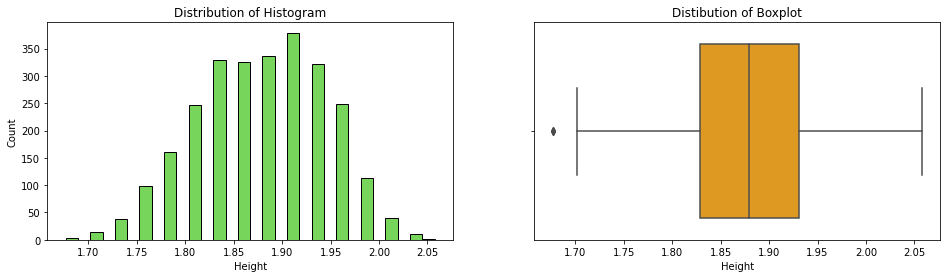

Skewness value -0.16868735864150705


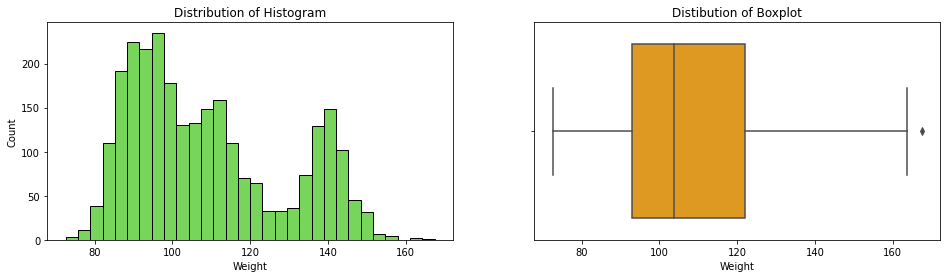

Skewness value 0.592880072419854


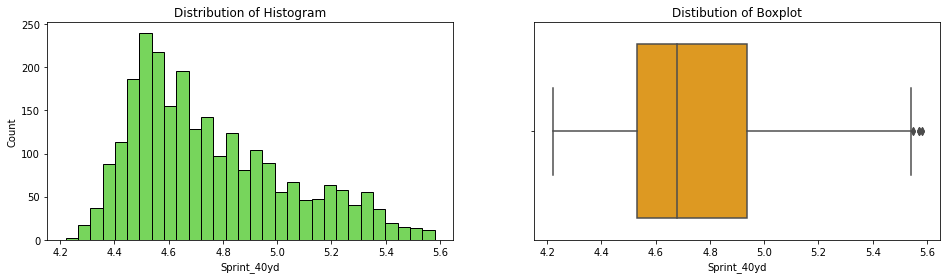

Skewness value 0.7526899889383623


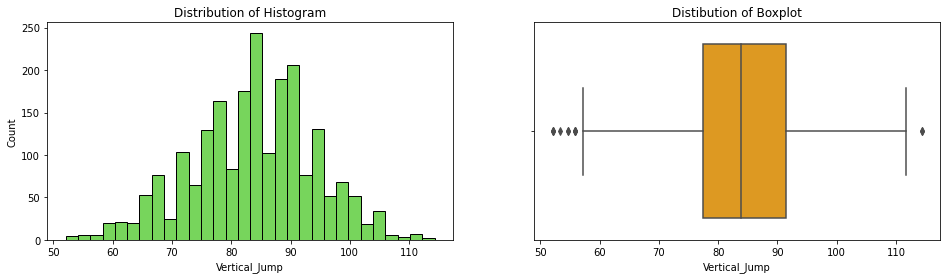

Skewness value -0.1938699589401427


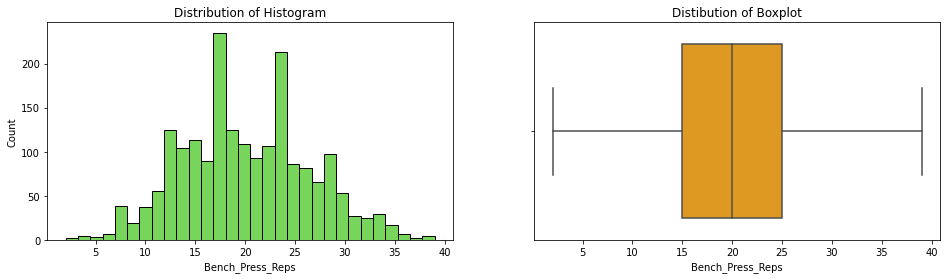

Skewness value 0.1663451092990582


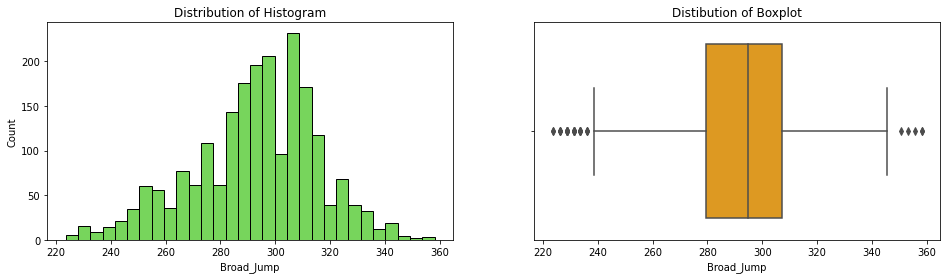

Skewness value -0.4118558987241599


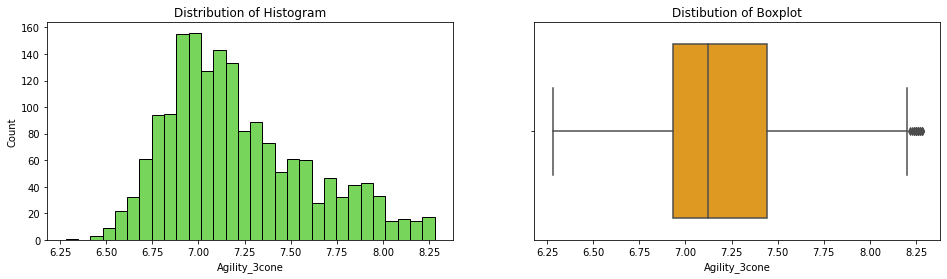

Skewness value 0.6962453254509178


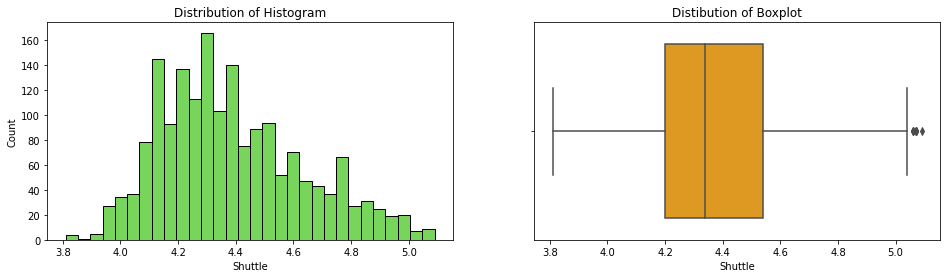

Skewness value 0.5658508009844646


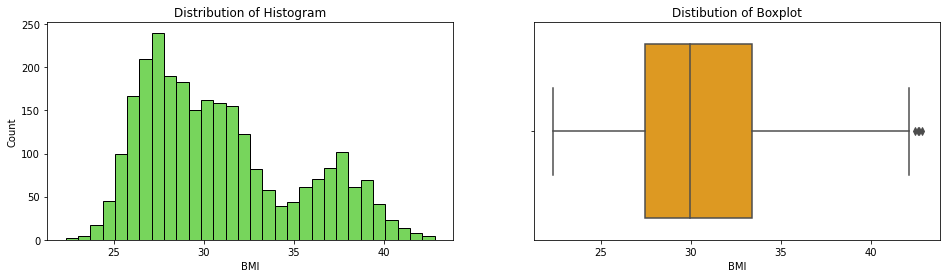

Skewness value 0.6679131793781593


In [22]:
print("Tampilan setelah di lakukan handling outliers")
for cols in X_train_handled.describe().columns:
    diagnostic_plots(X_train_handled, cols)
    print(f"Skewness value {X_train_handled[cols].skew()}")

Oke, sepertinya dalam proses trimming terlihat ada sekit pengurangan data akibat, data di trim(dihapus) untuk outliernya saja. Dan terlihat juga memang dari visualisasi boxplot tidak terlihat bersih begitu ya dalam penanganan outlier menggunakan trimming. Tetapi tidak masalah, kita akan melanjutkan ke tahapan berikutnya.. 

#### 5.3.2 Handling Missing Values

Di dalam handling missing values ini, akan melihat informasi berapa proporsi data yang hilang sehingga kita akan melakukan metode handling yang tepat untuk melakukan hanling missing values ini.

In [23]:
# Melihat missing value pada data X_train
pd.DataFrame(X_train_handled.isnull().mean()*100).rename(columns={0:'Percentage Missing Value in X_train'}).sort_values(by='Percentage Missing Value in X_train', ascending=False)

,Percentage Missing Value in X_train
Agility_3cone,35.033758
Drafted..tm.rnd.yr.,34.808702
Shuttle,32.708177
Bench_Press_Reps,25.993998
Broad_Jump,20.480120
Vertical_Jump,19.542386
Age,15.753938
Sprint_40yd,4.463616
Position_Type,0.000000
Player_Type,0.000000


Dari hasil pengecekan informasi mengenai percentage dari missing value, terlihat bahwa data pada Train-set khususnya di **X_train** terdapat  missing value. Di lihat dari missing valuenya. Bahwa ada 2 katergori missing value pada data ini.
- Untuk kolom yang tergolong dalam missinga value **MCAR** adalah `Agility_3cone`, `Drafted..tm.rnd.yr.`, `Shuttle`, `Bench_Press_Reps`, `Vertical_Jump`, dan `Sprint_40yd`. 
- Untuk kolom yang tergolong dalam missing value **MNAR** adalah `Age`. Karena kemungkinan ada beberapa pemian yang tidak mencantumkan umur mereka, sehingga kolom `Age` tergolong **MNAR**.

Dari hasil informasi diatas, kita akan melakukan handling missing values dengan metode **Impute** sesuai dengan ditribusinya.

In [24]:
# Melihat presentase Null-value di dalam Train-set
print('Percentage missing value in y_train :',y_train.isnull().mean()*100)

Percentage missing value in y_train : 0.0


Dari hasil pengecekan terhadap **y_train** terlihat tidak memiliki missing values. Sehingga kita tidak melakukan apa-apa.


In [25]:
# Meliaht Missing Value di dalam Test-set
pd.DataFrame(X_test.isnull().mean()*100).rename(columns={0:'Percentage Missing Value in X_test'}).sort_values(by='Percentage Missing Value in X_test', ascending=False)

,Percentage Missing Value in X_test
Agility_3cone,36.151603
Drafted..tm.rnd.yr.,35.131195
Shuttle,34.548105
Bench_Press_Reps,26.530612
Broad_Jump,22.886297
Vertical_Jump,21.720117
Age,15.451895
Sprint_40yd,7.142857
Position_Type,0.000000
Player_Type,0.000000


Dari hasil pengecekan informasi mengenai persentase missing values diatas. Sama halnya dengan **X_train**. 

Sehingga kita akan melakukan metode handling missing values dengan metode **Impute** sesuai dengan distribusi datanya.

In [26]:
# Melihat presentase Null-value di dalam Test-set
print('Percentage missing value in y_test :',y_test.isna().mean()*100)

Percentage missing value in y_test : 0.0


Sama halmnya dengan **y_train**. **y_test** sepertinya tidak memiliki missing values, sehingga kita tidak melakukan handling apapun.

Dari hasil inspeksi terhadap informasi terhadap presentase missing missing baik pada **train-set** dan **test-set**. Kita akan melakukan dengan bantuan library *Sckit-learn* yaitu adalah **SimpleImputer**. Kenapa saya menggunakan **SimpleImputer**, karena library tersebut bisa melakukan *fit_transform* sehingga kita akan melakukannya di pipeline.

### 5.4 Drop Unecessary Variables


In [27]:
# Drop kolom yang tidak dibutuhkan pada Train Set
X_train_handled.drop(columns=['Player', 'Year', 'Drafted..tm.rnd.yr.', 'BMI'], axis=1, inplace=True)

# Drop kolom yang tidak dibutuhkan pada Test Set
X_test.drop(columns=['Player', 'Year', 'Drafted..tm.rnd.yr.', 'BMI'], axis=1, inplace=True)

Alasan kenapa saya melakukan drop kolom tersebut..
- Pada kolom `Player` tidak ada kaitannya dengan prediksi berdasarkan nama pemain. Sehingga saya akan drop
- Pada kolom `Year` saya tidak ingin model bisa melakukan prediksi berdasarkan tahun player itu muncul. Sehingga saya lakukan drop
- Pada kolom `Drafted..tm.rnd.yr.` tidak ada kaitannya pemain akan direkrut berdasarkan draftnya. Sehingga saya melakukan drop pada kolom tersebut
- Pada kolom `BMI` karena kolom ini memiliki korelasi yang tinggi terhadap kolom `Weight` dan `Height`. Sehingga saya tidak mengginkan hal itu terjadi.


### 5.5 Features Selection

Kenapa harus ada fitur selection?
> Karena untuk mengurangi dimensi fitur ini. Feature selection memiliki kemampuan mengurangi dimensionalitas suatu data sehingga dapat meningkatkan performa dari model yang akan kita buat.

#### 5.5.1 Select fitur berdasarkan correlation untuk numerikal

In [28]:
# dengan fungsi ini kita dapat memilih fitur yang sangat berkorelasi
# kita akan menghapus fitur yang berkorelasi dengan fitur lainnya 

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_train_handled.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(X_train_handled, 0.8)
print(f"Berapa kolom yang tidak diperlukan untuk membuat model ? {len(set(corr_features))} kolom")
print(f"Kolom apa saja ?\n {corr_features}")

Berapa kolom yang tidak diperlukan untuk membuat model ? 4 kolom
Kolom apa saja ?
 {'Broad_Jump', 'Shuttle', 'Sprint_40yd', 'Agility_3cone'}


In [30]:
# Applying featur select 
X_train_handled.drop(corr_features,axis=1, inplace=True) #Drop kolom yang tidak diperlukan pada Train
X_test.drop(corr_features,axis=1, inplace=True) #Drop kolom yang tidak diperlukan pada Test
print("Berhasil melakukan Selection")

Berhasil melakukan Selection


#### 5.5.2 Select fitur bedasarkan hypotesis untuk kategorical

In [31]:
from scipy.stats import chi2_contingency

# Prepare data
categorical_cols = X_train_handled.select_dtypes(include='object').columns.tolist() # Pisah data untuk Categorikal
selection_cat = X_train_handled[categorical_cols] # Split categorical data
p = data_copy['Drafted'].replace({'No':0,'Yes':1})

#H0: Tidak ada hubungan yang signifikan antara label target terhadap kolom categorical
#H1: Ada hubungan yang signifikan antara label target terhadap kolom categorical
p_val = []
for col in selection_cat.columns:
    contingency_table=pd.crosstab(selection_cat[col],p)
    stat, p, dof, expected = chi2_contingency(contingency_table)
    p_val.append(p)

p_val_cat = pd.DataFrame({'COLS':selection_cat.columns,'P-Value':p_val})
drop_cols = p_val_cat[p_val_cat['P-Value']>0.05]
drop_cols

,COLS,P-Value
1,Player_Type,1.0
2,Position_Type,1.0
3,Position,1.0


Berdasarkan hasil hypotesis diatas, dapat kita lihat bahwa ada 3 kolom seperti `Player_Type`, `Position_Type`, dan `Position`  yang tidak memiliki hubungan dengan variable target kita. Sehingga kita akan melakukan drop terhadap kolom tersebut.

In [32]:
# Applying featur select 
X_train_handled.drop(columns=['Player_Type', 'Position_Type', 'Position'], axis=1, inplace=True) #Drop kolom yang tidak diperlukan pada Train
X_test.drop(columns=['Player_Type', 'Position_Type', 'Position'], axis=1, inplace=True) #Drop kolom yang tidak diperlukan pada Test
print("Berhasil melakukan Selection")

Berhasil melakukan Selection


In [33]:
# Define final variable
X_train_final = X_train_handled
y_train_final = y_train_handled

# Cek fitur yang akan digunakan 
X_train_final

,Age,School,Height,Weight,Vertical_Jump,Bench_Press_Reps
296,23.0,Iowa,1.8288,106.594207,88.90,26.0
751,22.0,Montana,1.8796,92.532843,90.17,19.0
92,22.0,Cincinnati,1.9304,116.119647,102.87,21.0
463,22.0,Georgia,1.9304,95.707990,87.63,18.0
853,22.0,Duke,1.9050,99.336729,NaN,NaN
...,...,...,...,...,...,...
1652,22.0,TCU,1.9812,145.149558,73.66,23.0
792,20.0,Georgia Tech,1.9304,97.522360,100.33,14.0
2970,NaN,Norfolk St.,2.0066,122.016347,82.55,24.0
1225,22.0,Furman,1.9304,141.974412,60.96,23.0


Setelah kita melakukan fitur selection menggunkaan treshold korlasi untuk numerikal dan menggunakan hypotesis sederhana untuk kategorikal. Didapatkan hanya 6 fitur saja yang akan kita gunakan dalam pembuatan model machine learning.

### 5.6 Feature Encode

In [34]:
# Encode fitur pada label target
y_train_final = y_train_final.replace({'No': 0, 'Yes':1})
y_test = y_test.replace({'No':0, 'Yes':1})

### 5.7 Membuat Pipeline

In [35]:
# Numerical Columns
num_columns = X_train_final.select_dtypes(include=np.number).columns

# Categorical Columns
cat_columns = X_train_final.select_dtypes(include='object').columns

print("Numerical Columns :", num_columns)
print("Categorical Columns :", cat_columns)

Numerical Columns : Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')
Categorical Columns : Index(['School'], dtype='object')


In [36]:
# Membuat pipeline untuk numerical
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")), #kita akan melakukan imputasi dengan mean, Karena kita sudah mengecek distribusinya bahwa normal
    ("scaler", StandardScaler())
])

# Membuat pipeline untuk kategorikal
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), #kita akan melakukan imputasi dengan mode
    ("encode", OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan pipeline numerical dan categorical
preprocessor = ColumnTransformer([
    ("numerical", numerical_pipeline, num_columns),
    ("categorical", categorical_pipeline, cat_columns),
    
], n_jobs=-1)

# 6. Model Definition

Disini kita akan menggunakan beberapa algoritma supervised mechine learning sepeerti:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. k-NN (k-nearest neighbors algorithm)
5. AdaBoost Classifier
6. SGDClassifier
7. GradientBoostingClassifier

In [37]:
# Pipeline model

# Logistic Regression
pipe_log = Pipeline([
    ("prep", preprocessor),
    ("algo_log", LogisticRegression()) # default param/best line model
])

# DecisionTreeClassifier
pipe_dec = Pipeline([
    ("prep", preprocessor),
    ("algo_dec", BaggingClassifier(DecisionTreeClassifier(random_state=0))) #default param/best line model
])

# Random Forest
pipe_ran = Pipeline([
    ("prep", preprocessor),
    ("algo_ran", BaggingClassifier(RandomForestClassifier(random_state=42))) #default param/best line model
])

# k-NN (k-nearest neighbors algorithm)
pipe_knn = Pipeline([
    ("prep", preprocessor),
    ("algo_knn", KNeighborsClassifier()) # default param/best line model
])

# AdaBoost Classifier
pipe_ada = Pipeline([
    ("prep", preprocessor),
    ("algo_ada", AdaBoostClassifier(random_state=42)) # default param/best line model
])

# SGDClassifier
pipe_sgd = Pipeline([
    ("prep", preprocessor),
    ("algo_sgd", SGDClassifier()) # default param/best line model
])

# GradientBoostingClassifier
pipe_gb = Pipeline([
    ("prep", preprocessor),
    ("algo_gb", GradientBoostingClassifier() )# default param/best line model
])

# 7. Model Training

### 7.1 Logistic Regression

In [38]:
# Training model Logistic Regression
%time pipe_log.fit(X_train_final, y_train_final)

Wall time: 3.33 s


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.2 Decision Tree

In [39]:
# Training model Decision Tree
%time pipe_dec.fit(X_train_final, y_train_final)

Wall time: 1.75 s


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.3 Random Forest

In [40]:
# Training model Random Forest
%time pipe_ran.fit(X_train_final, y_train_final)

Wall time: 6.86 s


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.4  k-NN (k-nearest neighbors algorithm)

In [41]:
# Training model k-NN (k-nearest neighbors algorithm)
%time pipe_knn.fit(X_train_final, y_train_final)

Wall time: 30 ms


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.5 AdaBoost Classifier

In [42]:
# Training model AdaBoost Classifier
%time pipe_ada.fit(X_train_final, y_train_final)

Wall time: 230 ms


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.6 SGDClassifier

In [43]:
# Training model SGDClassifier
%time pipe_sgd.fit(X_train_final, y_train_final)

Wall time: 46 ms


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

### 7.7 GradientBoostingClassifier

In [44]:
# Training model GradientBoostingClassifier
%time pipe_gb.fit(X_train_final, y_train_final)

Wall time: 357 ms


Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   On

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [45]:
# membuat list kosong
Train_score = []
Test_score = []
F1_score = []
ROC_AUC_Score = []
Time_teken = []

### 8.1 Logistic Regression

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.6909227306826706
Accuracy Test : 0.6282798833819242
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.7545717035611165
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.5213623012727866
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.42      0.16      0.23       241
           1       0.66      0.88      0.75       445

    accuracy                           0.63       686
   macro avg       0.54      0.52      0.49       686
weighted avg       0.58      0.63      0.57       686

-----------------

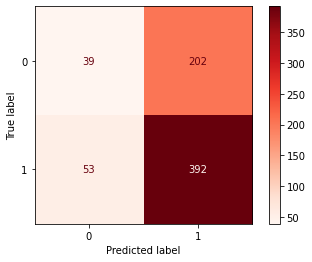


Time : 0.257 sec


In [46]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_log.predict(X_train_final)
y_pred_test = pipe_log.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_log, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.2 Decision Tree

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.9842460615153789
Accuracy Test : 0.749271137026239
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8189473684210526
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.6964147512704555
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.69      0.52      0.59       241
           1       0.77      0.87      0.82       445

    accuracy                           0.75       686
   macro avg       0.73      0.70      0.71       686
weighted avg       0.74      0.75      0.74       686

------------------

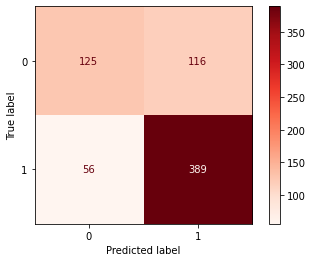


Time : 0.227 sec


In [47]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_dec.predict(X_train_final)
y_pred_test = pipe_dec.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_dec, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.3 Random Forest

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.9617404351087772
Accuracy Test : 0.7857142857142857
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8528528528528528
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.7130915194181546
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.86      0.47      0.61       241
           1       0.77      0.96      0.85       445

    accuracy                           0.79       686
   macro avg       0.81      0.71      0.73       686
weighted avg       0.80      0.79      0.77       686

-----------------

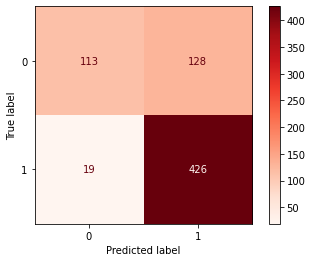


Time : 0.572 sec


In [48]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_ran.predict(X_train_final)
y_pred_test = pipe_ran.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_ran, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.4 k-NN (k-nearest neighbors algorithm)

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.7576894223555889
Accuracy Test : 0.6239067055393586
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.7334710743801652
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.5503286866520584
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.45      0.30      0.36       241
           1       0.68      0.80      0.73       445

    accuracy                           0.62       686
   macro avg       0.56      0.55      0.55       686
weighted avg       0.60      0.62      0.60       686

-----------------

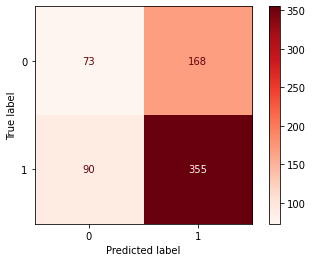


Time : 0.374 sec


In [49]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_knn.predict(X_train_final)
y_pred_test = pipe_knn.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_knn, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.5 AdaBoost Classifier

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.8060765191297824
Accuracy Test : 0.7871720116618076
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8545816733067729
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.7123129283416476
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.87      0.46      0.60       241
           1       0.77      0.96      0.85       445

    accuracy                           0.79       686
   macro avg       0.82      0.71      0.73       686
weighted avg       0.80      0.79      0.77       686

-----------------

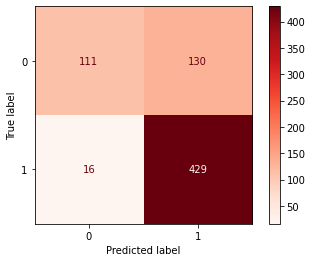


Time : 0.269 sec


In [50]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_ada.predict(X_train_final)
y_pred_test = pipe_ada.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_ada, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.6 SGDClassifier

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.6785446361590397
Accuracy Test : 0.6282798833819242
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.7482724580454098
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.5337265140565994
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.44      0.22      0.29       241
           1       0.67      0.85      0.75       445

    accuracy                           0.63       686
   macro avg       0.55      0.53      0.52       686
weighted avg       0.59      0.63      0.59       686

-----------------

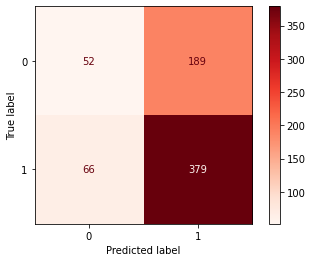


Time : 0.24 sec


In [51]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_sgd.predict(X_train_final)
y_pred_test = pipe_sgd.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_sgd, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.7 GradientBoostingClassifier

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.8210802700675168
Accuracy Test : 0.7973760932944607
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8633235004916422
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.7173248170077859
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.95      0.45      0.61       241
           1       0.77      0.99      0.86       445

    accuracy                           0.80       686
   macro avg       0.86      0.72      0.74       686
weighted avg       0.83      0.80      0.77       686

-----------------

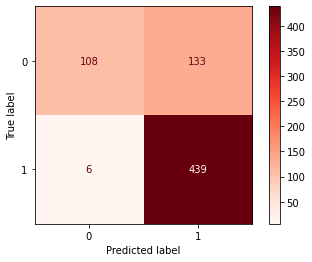


Time : 0.228 sec


In [52]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = pipe_gb.predict(X_train_final)
y_pred_test = pipe_gb.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(pipe_gb, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken.append(round(time_taken, 3))

### 8.8 Model Comparison 

In [53]:
# comparison algorithm
model_default = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN', 'AdaBoostClassifier', 'SGDClassifier', 'GradientBoostingClassifier'],
                          'Train score' : Train_score,
                          'Test score': Test_score, 
                          'ROC_AUC': ROC_AUC_Score,
                          'F1 SCORE': F1_score,
                          'Time taken (second)': Time_teken})

# Menampilkan dan melakukan shorting berdasarkan F1 Score
model_default.sort_values(by='F1 SCORE', ascending=False)

,Model,Train score,Test score,ROC_AUC,F1 SCORE,Time taken (second)
6,GradientBoostingClassifier,0.821080,0.797376,0.717325,0.863324,0.228
4,AdaBoostClassifier,0.806077,0.787172,0.712313,0.854582,0.269
2,Random Forest,0.961740,0.785714,0.713092,0.852853,0.572
1,Decision Tree,0.984246,0.749271,0.696415,0.818947,0.227
0,Logistic Regression,0.690923,0.628280,0.521362,0.754572,0.257
5,SGDClassifier,0.678545,0.628280,0.533727,0.748272,0.240
3,k-NN,0.757689,0.623907,0.550329,0.733471,0.374


Dari hasil tabel diatas, dengan algoritma menggunakan *default parameter* didapatkan hasil :
* Top 3 Best model berdasarkan **F1-Score** adalah :
    1. GradientBoostingClassifier, terlihat dari train dan test set model masuk kedalam **GOOD FIT**
    2. Random Forest, terlihat dari train dan test set model mengalami **Overfitting**
    3. AdaBoostClassifier, terlihat dari train dan test model bisa dikatakan **GOOD FIT**

Dari ke tiga model tersebut, saya akan melakukan **tuning** terhadap model yang tidak mengalami **overfitting**. Sehingga saya akan melakukannya pada model **GradientBoostingClassifier** dan  **AdaBoostClassifier**.

### 8.9 Hyperparameter tuning

Di dalam melakukan tuning ini, kita akan melakukan dengan 2 metode yaitu :
1. Random Search
2. Grid Search

Kita akan melakukan random search untuk menentukan parameter yang terbaik untuk model algoritma yang akan kita tuning. Sementara gridsearch kita akan mencari best parameter dari yang terbaik yang telah dilakukan random search. Dan nantinya kita akan mendapatkan model yang sangat baik mungkin atau bisa saja dari 2 model yang akan dilakukan tuning. akan mengalami peningkatan, atau juga tidak akan berpengaruh secara signifikan. Kita tidak tau sebelum mencobannya. So, let's go kita lakukan step ini.

#### 8.9.1 Random Search

##### GradientBoostingClassifier

In [54]:
# Create the random grid
random_grid = {
    'algo_gb__loss' : ['deviance', 'exponential'],
    'algo_gb__learning_rate': [0.01, 0.05, 0.1],
    'algo_gb__n_estimators' : np.arange(100,301,100),
    'algo_gb__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'algo_gb__min_samples_split': np.arange(2,5),
    'algo_gb__min_samples_leaf' : np.arange(2,5),
    'algo_gb__max_depth': np.arange(2,5)
}


gb_randomcv = RandomizedSearchCV(pipe_gb, param_distributions=random_grid, scoring="f1", cv=3, verbose=1, random_state=1, n_jobs=-1)
%time gb_randomcv.fit(X_train_final, y_train_final)
print('Best parameter :\n', gb_randomcv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 6min 25s
Best parameter :
 {'algo_gb__n_estimators': 200, 'algo_gb__min_samples_split': 4, 'algo_gb__min_samples_leaf': 3, 'algo_gb__max_depth': 3, 'algo_gb__loss': 'exponential', 'algo_gb__learning_rate': 0.01, 'algo_gb__criterion': 'mse'}


#### AdaBoostClassifier

In [55]:
# Create the random grid
random_grid = {
    'algo_ada__n_estimators' : [50, 100, 150, 200, 300],
    'algo_ada__learning_rate' : [0.1, 0.4, 0.8, 1, 1.2],
    'algo_ada__algorithm' : ['SAMME', 'SAMME.R']
}


ada_randomcv = RandomizedSearchCV(pipe_ada, param_distributions=random_grid, scoring="f1", cv=3, verbose=1, random_state=2, n_jobs=-1)
%time ada_randomcv.fit(X_train_final, y_train_final)
print('Best parameter :\n', ada_randomcv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 9.68 s
Best parameter :
 {'algo_ada__n_estimators': 50, 'algo_ada__learning_rate': 0.1, 'algo_ada__algorithm': 'SAMME'}


#### 8.9.2 GridSearchCV

##### GradientBoostingClassifier

In [56]:
# Create GridSearchCV
param_grid_gradient = {
    'algo_gb__n_estimators': [gb_randomcv.best_params_['algo_gb__n_estimators'] - 50,
                             gb_randomcv.best_params_['algo_gb__n_estimators'],
                             gb_randomcv.best_params_['algo_gb__n_estimators'] + 50],
    'algo_gb__min_samples_split': [gb_randomcv.best_params_['algo_gb__min_samples_split'] -1,
                                  gb_randomcv.best_params_['algo_gb__min_samples_split'],
                                  gb_randomcv.best_params_['algo_gb__min_samples_split'] +1],
    'algo_gb__min_samples_leaf': [gb_randomcv.best_params_['algo_gb__min_samples_leaf'] -1,
                                 gb_randomcv.best_params_['algo_gb__min_samples_leaf'],
                                 gb_randomcv.best_params_['algo_gb__min_samples_leaf'] +1],
    'algo_gb__max_depth': [gb_randomcv.best_params_['algo_gb__max_depth'] -1,
                          gb_randomcv.best_params_['algo_gb__max_depth'],
                          gb_randomcv.best_params_['algo_gb__max_depth'] +1],
    'algo_gb__loss': [gb_randomcv.best_params_['algo_gb__loss']],
    'algo_gb__learning_rate': [gb_randomcv.best_params_['algo_gb__learning_rate'] - 0.002,
                              gb_randomcv.best_params_['algo_gb__learning_rate'],
                              gb_randomcv.best_params_['algo_gb__learning_rate'] + 0.002],
    'algo_gb__criterion' : [gb_randomcv.best_params_['algo_gb__criterion']]
}
gb_gridcv = GridSearchCV(estimator=pipe_gb, param_grid=param_grid_gradient, cv=3, verbose=1, n_jobs=-1, scoring='f1')
%time gb_gridcv.fit(X_train_final, y_train_final)
print('Best parameter :\n', gb_gridcv.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Wall time: 3min 46s
Best parameter :
 {'algo_gb__criterion': 'mse', 'algo_gb__learning_rate': 0.008, 'algo_gb__loss': 'exponential', 'algo_gb__max_depth': 3, 'algo_gb__min_samples_leaf': 2, 'algo_gb__min_samples_split': 4, 'algo_gb__n_estimators': 200}


In [57]:
# define model best after tuning
model_gb = gb_gridcv.best_estimator_

##### AdaBoostClassifier

In [58]:
# Create GridSearchCV
param_grid_ada = {
    'algo_ada__n_estimators' : [ada_randomcv.best_params_['algo_ada__n_estimators'] - 10,
                               ada_randomcv.best_params_['algo_ada__n_estimators'],
                               ada_randomcv.best_params_['algo_ada__n_estimators'] + 10],
    'algo_ada__learning_rate' : [ada_randomcv.best_params_['algo_ada__learning_rate'] - 0.05,
                                ada_randomcv.best_params_['algo_ada__learning_rate'] - 0.02,
                                ada_randomcv.best_params_['algo_ada__learning_rate'],
                                ada_randomcv.best_params_['algo_ada__learning_rate'] + 0.02,
                                ada_randomcv.best_params_['algo_ada__learning_rate'] + 0.05],
    'algo_ada__algorithm' : [ada_randomcv.best_params_['algo_ada__algorithm']]
}
ada_gridcv = GridSearchCV(estimator=pipe_ada, param_grid=param_grid_ada, cv=3, verbose=2, n_jobs=-1, scoring='f1')
%time ada_gridcv.fit(X_train_final, y_train_final)
print('Best parameter :\n', ada_gridcv.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Wall time: 4.56 s
Best parameter :
 {'algo_ada__algorithm': 'SAMME', 'algo_ada__learning_rate': 0.08, 'algo_ada__n_estimators': 50}


In [59]:
# define model best after tuning
model_ada = ada_gridcv.best_estimator_

Setelah melakukan tuning terhadap kedua model baik pada **GradientBoostingClassifier** dan **AdaBoostClassifier** didapatkan hasil parameter terbaiknya :
- **GradientBoostingClassifier**  Best parameter :
 {'algo_gb__criterion': 'mse', 'algo_gb__learning_rate': 0.008, 'algo_gb__loss': 'exponential', 'algo_gb__max_depth': 3, 'algo_gb__min_samples_leaf': 2, 'algo_gb__min_samples_split': 4, 'algo_gb__n_estimators': 200}
- **AdaBoostClassifier** Best parameter :
 {'algo_ada__algorithm': 'SAMME', 'algo_ada__learning_rate': 0.08, 'algo_ada__n_estimators': 50}

### 8.10 Model Evaluation After Tuning

In [60]:
# membuat list kosong
Train_score_sesudah = []
Test_score_sesudah = []
F1_score_sesudah = []
ROC_AUC_Score_sesudah = []
Time_teken_sesudah = []

#### 8.10.1 GradientBoostingClassifier

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.8019504876219055
Accuracy Test : 0.8032069970845481
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8682926829268294
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.7199170124481328
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      0.44      0.61       241
           1       0.77      1.00      0.87       445

    accuracy                           0.80       686
   macro avg       0.88      0.72      0.74       686
weighted avg       0.85      0.80      0.78       686

-----------------

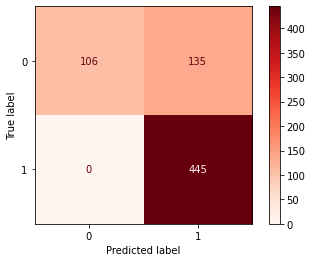


Time : 0.289 sec


In [61]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = model_gb.predict(X_train_final)
y_pred_test = model_gb.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score_sesudah.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score_sesudah.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score_sesudah.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score_sesudah.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(model_gb, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken_sesudah.append(round(time_taken, 3))

#### 8.10.2 AdaBoostClassifier

--------------------------------------------------
===== ACURACCY SCORE =====
Accuracy Train : 0.8019504876219055
Accuracy Test : 0.8032069970845481
--------------------------------------------------
--------------------------------------------------
===== F1 Score =====
F1 Score :  0.8682926829268294
--------------------------------------------------
--------------------------------------------------
===== ROC AUC Score =====
ROC AUC Score :  0.7199170124481328
--------------------------------------------------
--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      0.44      0.61       241
           1       0.77      1.00      0.87       445

    accuracy                           0.80       686
   macro avg       0.88      0.72      0.74       686
weighted avg       0.85      0.80      0.78       686

-----------------

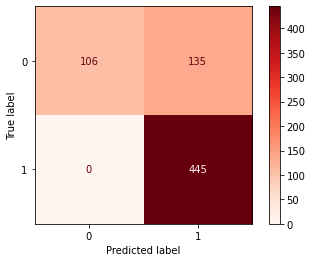


Time : 0.344 sec


In [62]:
# Model Evaluation

## Predict on Train-Set and Test-Set
y_pred_train = model_ada.predict(X_train_final)
y_pred_test = model_ada.predict(X_test)

tic = time.time()

# Evaluate Model of matriks
print('-'*50)
print('===== ACURACCY SCORE =====')
print('Accuracy Train :',accuracy_score(y_train_final, y_pred_train))
Train_score_sesudah.append(accuracy_score(y_train_final, y_pred_train))
print('Accuracy Test :',accuracy_score(y_test, y_pred_test))
Test_score_sesudah.append(accuracy_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== F1 Score =====')
print('F1 Score : ', f1_score(y_test, y_pred_test))
F1_score_sesudah.append(f1_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== ROC AUC Score =====')
print('ROC AUC Score : ', roc_auc_score(y_test, y_pred_test))
ROC_AUC_Score_sesudah.append(roc_auc_score(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',classification_report(y_test, y_pred_test))
print('-'*50)

print('-'*50)
print('===== Confusion Matrix =====')
print('-'*50)
plot_confusion_matrix(model_ada, X_test, y_test, cmap='Reds')  
plt.show()
print('')

toc = time.time()
time_taken = toc-tic
print('Time : {} sec'.format(round(time_taken, 3)))
Time_teken_sesudah.append(round(time_taken, 3))

### 8.11 Model Comparison before dan after tuning

In [63]:
# Create Dataframe model, after tuning
model_after_tuning = pd.DataFrame({'Model': ['GradientBoostingClassifier', 'AdaBoostClassifier'],
                          'Train score' : Train_score_sesudah,
                          'Test score': Test_score_sesudah, 
                          'ROC_AUC': ROC_AUC_Score_sesudah,
                          'F1 SCORE': F1_score_sesudah,
                          'Time taken (second)': Time_teken_sesudah})


In [64]:
# Show model before tuning
model_default.sort_values(by='F1 SCORE', ascending=False).head(3)

,Model,Train score,Test score,ROC_AUC,F1 SCORE,Time taken (second)
6,GradientBoostingClassifier,0.821080,0.797376,0.717325,0.863324,0.228
4,AdaBoostClassifier,0.806077,0.787172,0.712313,0.854582,0.269
2,Random Forest,0.961740,0.785714,0.713092,0.852853,0.572


In [65]:
# Show model after tuning
model_after_tuning.sort_values(by='F1 SCORE', ascending=False)

,Model,Train score,Test score,ROC_AUC,F1 SCORE,Time taken (second)
0,GradientBoostingClassifier,0.80195,0.803207,0.719917,0.868293,0.289
1,AdaBoostClassifier,0.80195,0.803207,0.719917,0.868293,0.344


Dari hasil komparasi model sebelum dan sesudah tuning terlihat bahwa :
- untuk model **GradientBoostingClassifier** tidak ada peningkatan secara signifikan dari sebelum dan sesudah tuning. Tetapi terlihat ada sedikit perbedaan pada nilai train dan test. Sehingga model bisa dikatan benar-benar **GOOD FITT**
- untuk model **AdaBoostClassifier** terlihat ada hanya sedikit peningkatan setalah dilakukan tuning. Tetapi terlihat pada train dan test sedikit ada perbedaan pada nilainya, Sehingga model bisa dikatakan **GOOD FITT**

Dari hasil kedua model setelah dilakukan tuning. Kita akan menggunakan model dari **GradientBoostingClassifier** untuk melakukan model inference dan membuat dashboard nantinya.

# 9. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [66]:
# Melakukan penyimpanan model
import pickle

# model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model_gb, model_file)

# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [71]:
# melihat data inference yang telah kita siapkan sebelumnya
data_inf.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2013,Josh Boyd\BoydJo00,23.0,Mississippi St.,1.9050,140.613635,5.14,67.31,32.0,264.16,7.16,4.64,Green Bay Packers / 5th / 167th pick / 2013,38.746946,defense,defensive_lineman,DT,Yes
1,2009,Clint Sintim\SintCl99,23.0,Virginia,1.9050,116.119647,4.75,87.63,NaN,302.26,7.37,4.40,New York Giants / 2nd / 45th pick / 2009,31.997478,defense,line_backer,OLB,Yes
2,2017,T.J. Watt\WattT.00,22.0,Wisconsin,1.9304,114.305277,4.69,93.98,21.0,325.12,6.79,4.13,Pittsburgh Steelers / 1st / 30th pick / 2017,30.674088,defense,line_backer,OLB,Yes
3,2014,Pierre Desir\DesiPi00,23.0,Lindenwood,1.8542,89.811289,4.59,88.90,11.0,337.82,6.86,4.30,Cleveland Browns / 4th / 127th pick / 2014,26.122683,defense,defensive_back,CB,Yes
4,2019,Keenen Brown\BrowKe03,23.0,Texas St.,1.8796,113.398093,4.75,83.82,17.0,297.18,7.27,4.51,NaN,32.097771,offense,backs_receivers,TE,No


In [79]:
# Predict Model Inference
y_pred_inf = model_gb.predict(data_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Drafted - Prediction'])
y_pred_inf.replace({0:'No', 1:'Yes'}, inplace=True)

# Create New Variabel DataFrame
data_inf_select = data_inf[['Age', 'School', 'Height', 'Weight', 'Vertical_Jump', 'Bench_Press_Reps']]
# Concate to Original Inference-Set
pd.concat([data_inf_select, y_pred_inf], axis=1).head(10)

,Age,School,Height,Weight,Vertical_Jump,Bench_Press_Reps,Drafted - Prediction
0,23.0,Mississippi St.,1.9050,140.613635,67.31,32.0,Yes
1,23.0,Virginia,1.9050,116.119647,87.63,NaN,Yes
2,22.0,Wisconsin,1.9304,114.305277,93.98,21.0,Yes
3,23.0,Lindenwood,1.8542,89.811289,88.90,11.0,Yes
4,23.0,Texas St.,1.8796,113.398093,83.82,17.0,Yes
5,21.0,Clemson,1.9812,147.871113,73.66,33.0,Yes
6,22.0,USC,1.9304,113.398093,NaN,20.0,Yes
7,NaN,Dixie State,1.9050,121.562755,NaN,35.0,No
8,NaN,Texas Tech,1.9304,93.440028,93.98,6.0,No
9,22.0,Oklahoma,1.8542,91.625659,90.17,20.0,Yes


# 11. Pengambilan Kesimpulan

Oke kita sudah selasai membuat sebuah model machine learning, yang diperuntukan untuk memprediksi klasifikasi biner, untuk membantu agent dalam melakukan rekrut pemain NFL dengan mempertimbangkan beberapa fitur yang digunakan untuk mendapatkan hasil model yang cukup baik. Agar memudahkan agent untuk menentukan apakah pemain yang akan direkrut itu sudah masuk kedalam syarat menjadi pemain NFL atau belum.


## Model Analysis

Dari hasil melakukan pemodelan dengan menggunakan beberapa model algoritma machine learning yang telah kita pelajari di Hacktiv8 ini. Dari hasil menggunakan default parameter terhadap model yang kita gunakan, ternyata kita mendapatkan 3 best model berdasarkan default parameter yang digunakan. Saya mengurutkan berdasarkan nilai score F1 Score.

Top 3 Best model berdasarkan **F1-Score** adalah :
1. **GradientBoostingClassifier** 
2. **RandomForestClassifier** 
3. **AdaBoostClassifier** 

| Model| Train Score | Test Score | F1-Score | Overview |
|-|-|-|-|-|
| GradientBoostingClassifier | 0.819580 | 0.798834 | 0.864173 | Good Fit |
| RandomForestClassifier | 0.951613 | 0.790087 | 0.856287 | Overfitting |
| AdaBoostClassifier | 0.806077 | 0.787172 | 0.854582 | Good Fit |

Dari Top 3 model tersebut hanya 2 model yang dilakukan **Hyperparameter Tuning** pada model yang **Good Fit** saja. Dengan menggunakan 2 metode yaitu **RandomSearchCV** dan **GridSearchCV**. Setelah melakukan tuning didaptkan hasil :
1. **GradientBoostingClassifier** 
    - Best parameter :
        |Parameter| Result|
        |-|-|
        |criterion|mse|
        |learning_rate|0.008|
        |loss|exponential|
        |max_depth|3|
        |min_samples_leaf|2|
        |min_samples_split|4|
        |n_estimators|200|
2. **AdaBoostClassifier**
    - Best parameter
        |Parameter|Result|
        |-|-|
        |algorithm|SAMME|
        |learning_rate|0.08|
        |n_estimators|50|


Didapatkan hasil after tuning :

| Model| Train Score | Test Score | F1-Score | Overview |
|-|-|-|-|-|
| GradientBoostingClassifier | 0.80195 | 0.803207 | 0.868293 | Good Fit |
| AdaBoostClassifier | 0.80195 | 0.803207 | 0.868293 | Good Fit |

- untuk model **GradientBoostingClassifier** tidak terlihat ada peningkatan secara signifikan dari sebelum dan sesudah tuning. Tetapi terlihat ada sedikit perbedaan pada nilai train dan test. Sehingga model bisa dikatan benar-benar **GOOD FITT**
- untuk model **AdaBoostClassifier** terlihat hanya ada sedikit peningkatan setalah dilakukan tuning. Tetapi terlihat pada train dan test sedikit ada perbedaan pada nilainya, Sehingga model bisa dikatakan **GOOD FITT**


## Overall Analysis
Setelah melakukan serangkaian kegiatan untuk membuat model machine learning di kernel ini, kita akan menarik beberapa inforamasi yaitu :
- Dari hasil melakukan ekplorasi data, kita mendapatkan informasi bahwa fitur `School` memiliki informasi tentang latar belakang mengenai pendidikan akademi untuk menjadi pemain NFL. Terlihat ada beberapa sekolah memiliki reputasi yang bagus sehingga tim-tim NFL yang menginkan pemain baru, mereka bisa memprioritaskan untuk merekrut pemain-pemain dari lulusan Akademi yang memiliki reputasi yang baik.
- Kemudian kita bisa menarik informasi bahwa pemain NFL dituntut untuk memiliki peforma statistik yang bagus pada tubuh mereka. Karena pada dasarnya permaian tim NFL mengandalkan fisik dan speed yang tinggi untuk meraih kemenangan. Maksudnya apa, iya dalam permainan NFL membutuhkan seorang pemain yang mampu bergerak membawa bola kemudian berlari sampai ujung garis lawan. Dan pemain yang lain membantu pemain yang membawa bola untuk menghadang para lawan agar pemain yang membawa bola tidak bisa dijatuhkan atau bolanya direbut. Untuk itu perlunya fisik yang kuat dan memiliki speed didalam tim. 
- Dari hasil seleksi fitur yang akan digunakan untuk pembuatan model machine learning dalam menentukan apakah pemain akan di rekrut atau tidak begitu ya. Di dapatkan hanya 6 fitur saja, seperti `Age`, `School`, `Height`, `Weight`, `Vertical_Jump`, `Bench_Press_Reps`.
- Didapatkan model terbaik untuk dilakukan deployment yaitu model dengan algoritma **GradienBoostingClassifier** yang telah dilakukan tuning sebelumnya.